In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

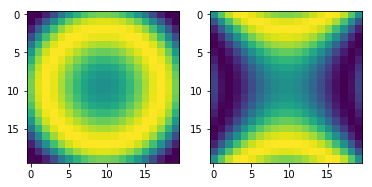

In [2]:
#Generate some random pictures
NPIX_X = 20
discr = np.linspace(0, 1, NPIX_X)
pic1 = np.array([[np.sin(10*((x-0.5)**2+(y-0.5)**2)) for y in discr] for x in discr])
# pic1 = np.array([[x for y in discr] for x in discr])
pic2 = np.array([[np.sin(10*((x-0.5)**2-(y-0.5)**2)) for y in discr] for x in discr])


fig, ax = plt.subplots(ncols=2)
ax[0].imshow(pic1)
ax[1].imshow(pic2);

Learning period - Spike Threshold Adapts to Spiking Rate


<IPython.core.display.Javascript object>


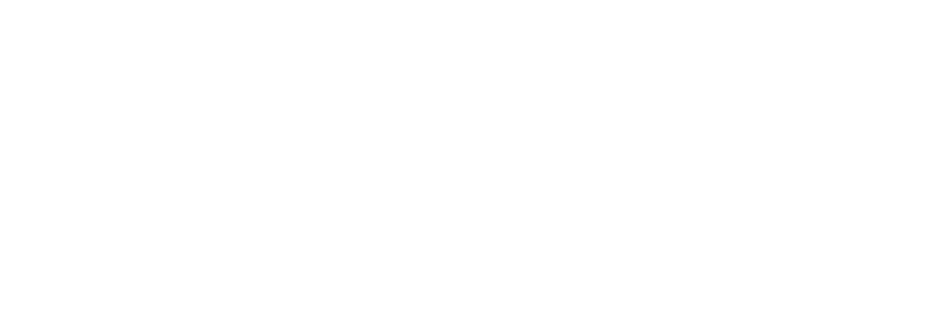

Testing period - Spike Threshold Fixed, Input Random


<IPython.core.display.Javascript object>


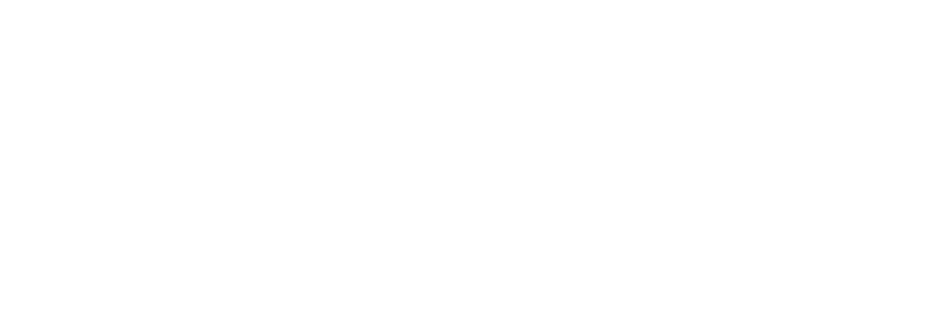

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


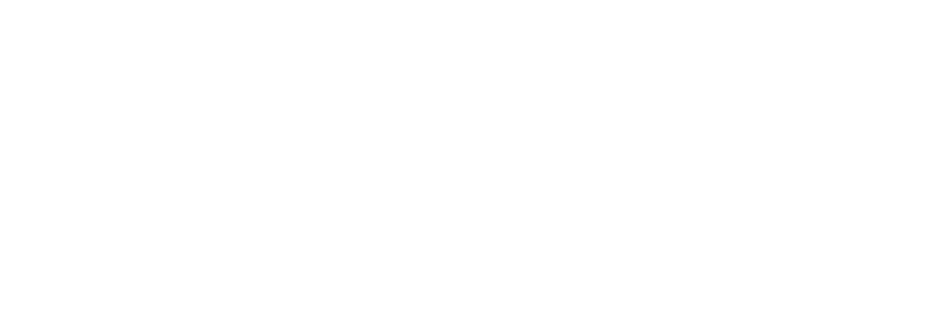

<IPython.core.display.Javascript object>


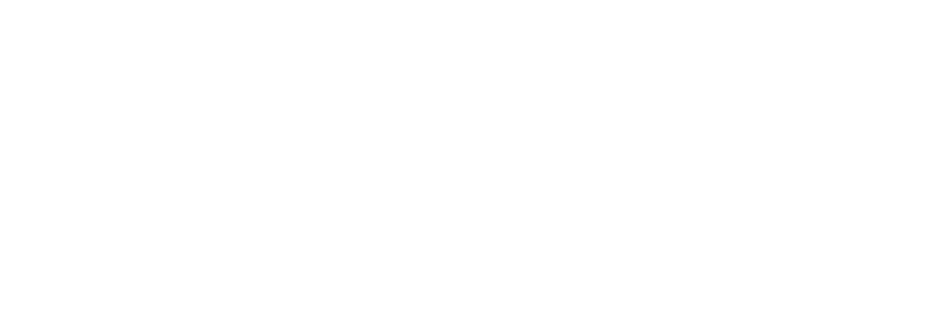

In [3]:
def primitiveNeuron(V, I, dt, V_T, V_0):
    VNEW = V + I*dt
    SPIKE = VNEW > V_T
    VNEW[SPIKE] = V_0
    return VNEW, SPIKE.astype(int)

def sigmoidLearning(x):
    return 1 / (np.exp(-(x-0.5)*3) + 1)

def nonlinearEvolve(x, u, tau):
    return x*(1-x)*((u-0.5/tau)*3 + np.log(1/x - 1) / tau) 
    
DT = 0.001
VT_MAX = 1.0
V0 = 0.0
tauAvg = 1.0
tauIP = 10.0
VT = np.ones((NPIX_X, NPIX_X)) * VT_MAX / 2
Vthis = np.zeros((NPIX_X, NPIX_X))
SP    = np.zeros((NPIX_X, NPIX_X))
SP_SLOW = np.zeros((NPIX_X, NPIX_X))
avg    = np.ones((NPIX_X, NPIX_X)) * VT_MAX * 0.9
T_LEARN = 20
timesLearn = np.arange(0, T_LEARN, DT)


######################################
print("Learning period - Spike Threshold Adapts to Spiking Rate")
######################################

%matplotlib notebook
plt.ion()
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
plt1 = ax[0].imshow(Vthis, vmin=V0, vmax=VT_MAX)
plt2 = ax[1].imshow(avg, vmin=0, vmax=2)
plt3 = ax[2].imshow(VT, vmin=0, vmax=1)
ax[0].set_title('Membrane Potential')
ax[1].set_title('Average spike rate')
ax[2].set_title('Spike Threshold')
plt.draw()
plt.pause(0.001)

for i in range(len(timesLearn)):
    inp1 = pic1 + np.random.uniform(-0.1, 0.1, NPIX_X**2).reshape((NPIX_X, NPIX_X))
    Vthis, SP = primitiveNeuron(Vthis, inp1, DT, VT, V0)
    avg += SP - avg * DT / tauAvg
    VT += (sigmoidLearning(avg) - VT) * DT / tauIP
#     avg += nonlinearEvolve(avg, SP, tauSlow)*DT
#     VT = (1 - ipRate) * VT + ipRate*avg
    
    if (i % 100) == 0:
        plt1.set_data(Vthis)
        plt2.set_data(avg)
        plt3.set_data(VT)

        fig.canvas.draw()
        fig.canvas.flush_events()

    
######################################
print("Testing period - Spike Threshold Fixed, Input Random")
######################################

T_RANDOM = 20
timesRand = np.arange(0, T_RANDOM, DT)

integralRate = 0.1
integralAvg = np.zeros((NPIX_X, NPIX_X))
randInp = np.zeros((NPIX_X, NPIX_X))

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
plt1 = ax[0].imshow(randInp, vmin=0, vmax=1)
plt2 = ax[1].imshow(Vthis, vmin=V0, vmax=VT_MAX)
plt3 = ax[2].imshow(integralAvg, vmin=0, vmax=5)
ax[0].set_title('Random Input')
ax[1].set_title('Membrane Potential')
ax[2].set_title('Average Spike Rate')
plt.draw()
plt.pause(0.001)

for i in range(len(timesRand)):
    randInp = np.random.uniform(0, 1, NPIX_X**2).reshape((NPIX_X, NPIX_X))
    Vthis, SP = primitiveNeuron(Vthis, randInp, DT, VT, V0)
    integralAvg += SP
    
    if (i % 100) == 0:
        plt1.set_data(randInp)
        plt2.set_data(Vthis)
        plt3.set_data(integralAvg / (i * DT))

        fig.canvas.draw()
        fig.canvas.flush_events()

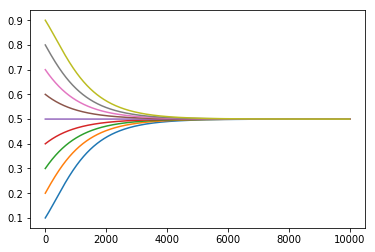

In [7]:
NP = 10000
xx = np.zeros((NP, 9))
xx[0] = np.arange(0.1, 1, 0.1)
for i in range(NP-1):
    xx[i+1] = xx[i] + 0.001 * xx[i]*(1 - xx[i])*( np.log(1/xx[i] - 1))

%matplotlib inline
plt.figure()
for j in range(9):
    plt.plot(xx[:,j])

plt.show()